In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# 검증데이터 분할
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2, stratify = y_train, random_state = 12)

NameError: name 'scaled_train' is not defined

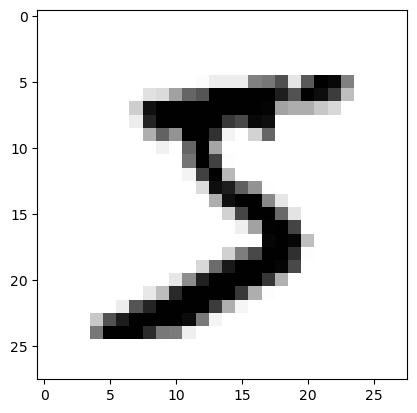

In [53]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [54]:
x_train.shape

(60000, 28, 28)

In [55]:
y_train.max()

9

In [56]:
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255
scaled_sub = x_sub.reshape(-1, 28, 28, 1) / 255
scaled_val = x_val.reshape(-1, 28, 28, 1) / 255

In [57]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same", input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = "softmax"))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [58]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [59]:
history = model.fit(scaled_sub, y_sub, epochs = 1000, validation_data = (scaled_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.4121 - loss: 1.6042 - val_accuracy: 0.9059 - val_loss: 0.3147
Epoch 2/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.8699 - loss: 0.4167 - val_accuracy: 0.9436 - val_loss: 0.1983
Epoch 3/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9021 - loss: 0.3081 - val_accuracy: 0.9545 - val_loss: 0.1583
Epoch 4/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9210 - loss: 0.2573 - val_accuracy: 0.9608 - val_loss: 0.1299
Epoch 5/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9324 - loss: 0.2162 - val_accuracy: 0.9643 - val_loss: 0.1194
Epoch 6/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9398 - loss: 0.1918 - val_accuracy: 0.9682 - val_loss: 0.1029
Epoch 7/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9469 - loss: 0.1735 - val_accuracy: 0.9696 - val_loss: 0.0961
Epoch 8/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - ac

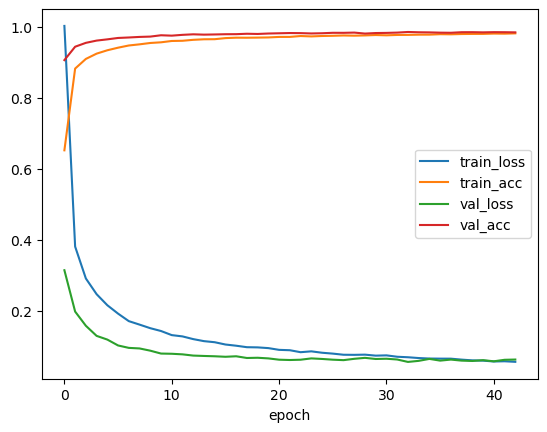

In [60]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 강사님 답

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train[0]

5

In [7]:
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

# 합성곱 신경망 설정

In [25]:
model = keras.Sequential()

In [26]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = "softmax"))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [28]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [29]:
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2, stratify = y_train, random_state = 12)

In [30]:
history = model.fit(x_sub, y_sub, validation_data = (x_val, y_val), epochs = 30, callbacks = [early_stopping_cb])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.8646 - loss: 0.4245 - val_accuracy: 0.9815 - val_loss: 0.0601
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9767 - loss: 0.0806 - val_accuracy: 0.9858 - val_loss: 0.0447
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9835 - loss: 0.0572 - val_accuracy: 0.9868 - val_loss: 0.0425
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9879 - val_loss: 0.0348
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9888 - loss: 0.0350 - val_accuracy: 0.9893 - val_loss: 0.0398
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9903 - val_loss: 0.0290
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9903 - val_loss: 0.0344
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9931 -

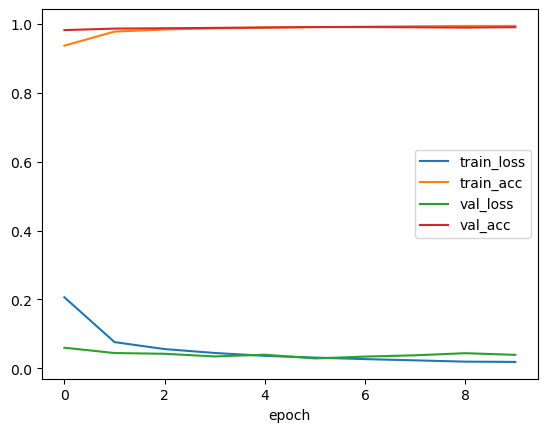

In [31]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

In [32]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9888 - loss: 0.0340


[0.02652069926261902, 0.9914000034332275]

In [33]:
preds = model.predict(scaled_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [34]:
preds.shape

(10000, 10)

In [35]:
preds[0]

array([7.1628298e-10, 2.6083228e-08, 1.5233349e-08, 4.4089688e-07,
       7.9785032e-09, 2.8123035e-08, 2.5675301e-13, 9.9998844e-01,
       1.3155683e-08, 1.1072182e-05], dtype=float32)

In [37]:
pred_arr = np.argmax(preds, axis = 1)

In [38]:
pred_arr

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
x_match = []

for idx, item in enumerate(pred_arr):
    if item != y_test[idx]:
        x_match.append(idx)

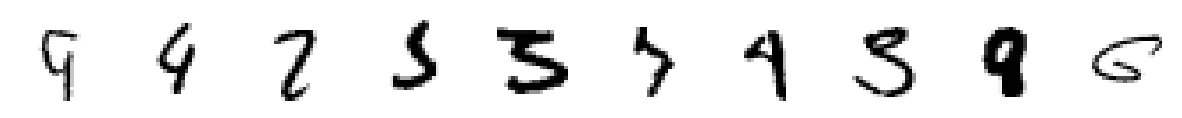

In [41]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i, item in enumerate(x_match[:10]):
    axs[i].imshow(x_test[item], cmap = "gray_r")
    axs[i].axis("off")
    
plt.show()

In [42]:
y_test[x_match[:10]]

array([9, 4, 2, 5, 3, 7, 4, 3, 8, 6], dtype=uint8)